In [1]:

# import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.replace({'sex':{'male':0, 'female':1}},inplace= True)

# Encoding smoker column 
df.replace({'smoker':{'yes':0, 'no':1}},inplace= True)

# Encoding smoker column 
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}},inplace= True)

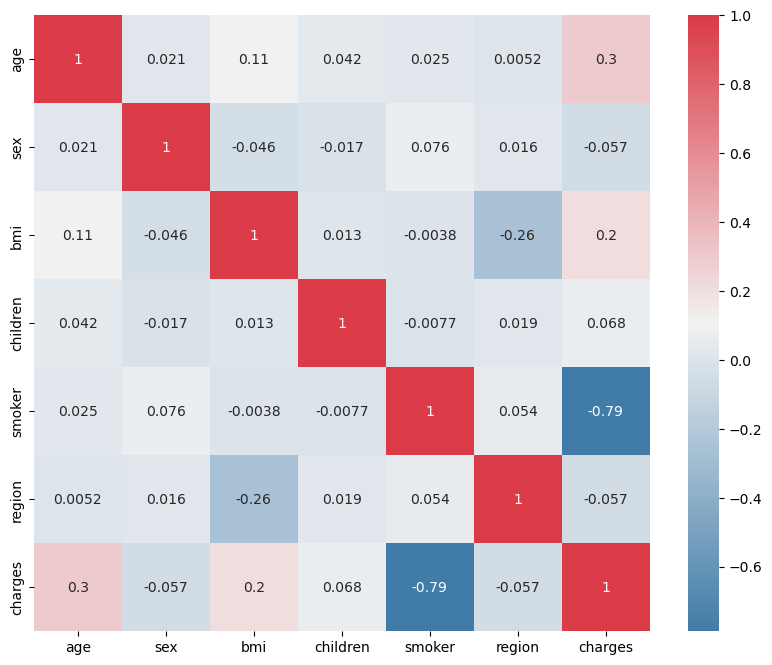

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()

# Plot the heatmap with annotations
sns.heatmap(corr, cmap=sns.diverging_palette(240, 10, as_cmap=True), square=True, ax=ax, annot=True)
plt.show()

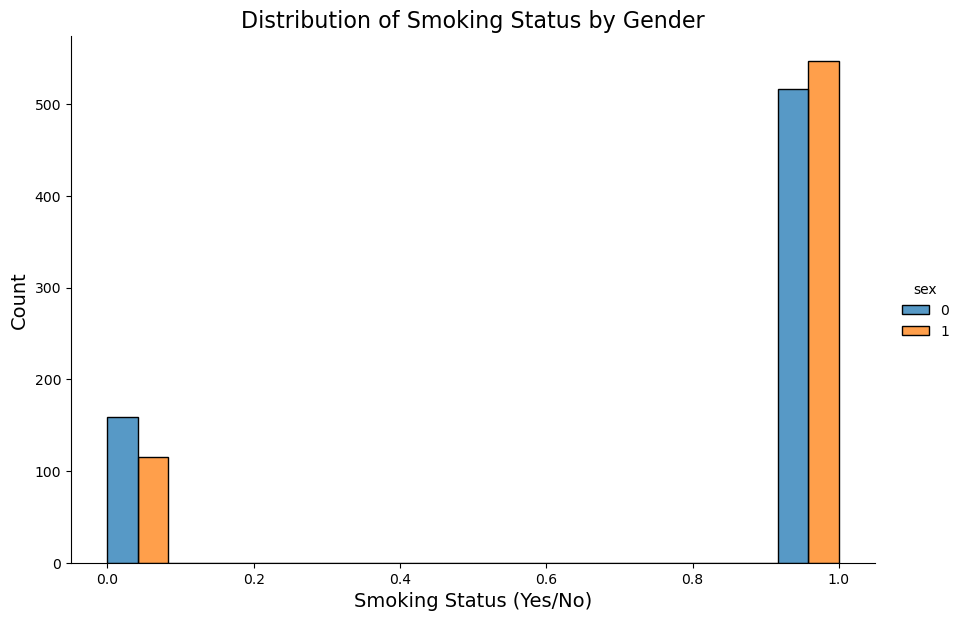

In [8]:
# Create the displot
sns.displot(df, x="smoker", hue="sex", multiple="dodge", height=6, aspect=1.5)

# Add title and labels
plt.title("Distribution of Smoking Status by Gender", fontsize=16)
plt.xlabel("Smoking Status (Yes/No)", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show the plot
plt.show()

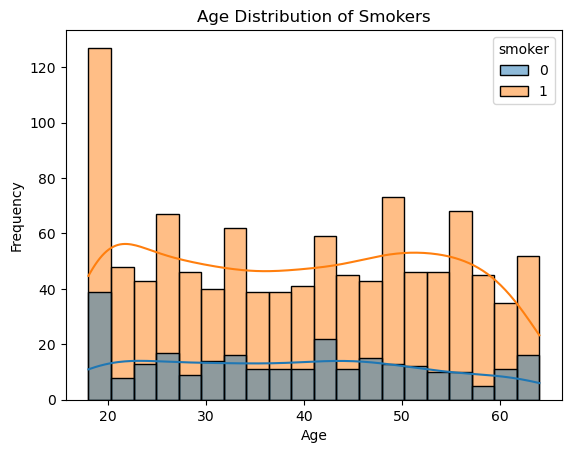

In [9]:
sns.histplot(data=df, x='age', hue='smoker', kde=True, bins=20)

# Display the plot
plt.title('Age Distribution of Smokers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

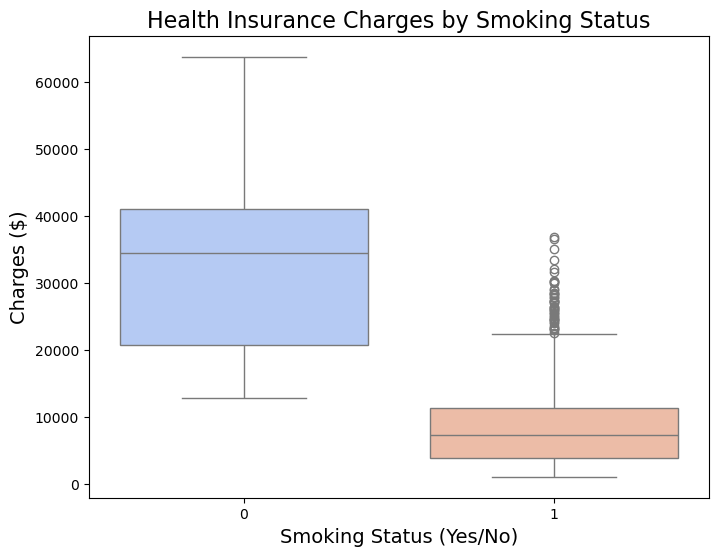

In [10]:


# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="smoker", y="charges", palette="coolwarm")

# Add title and labels
plt.title("Health Insurance Charges by Smoking Status", fontsize=16)
plt.xlabel("Smoking Status (Yes/No)", fontsize=14)
plt.ylabel("Charges ($)", fontsize=14)

# Show the plot
plt.show()

C:\Users\7202C\AppData\Local\Temp\ipykernel_24444\1434882466.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(df, x="bmi", kde=True, height=6, aspect=1.5, palette=["green", "purple"])


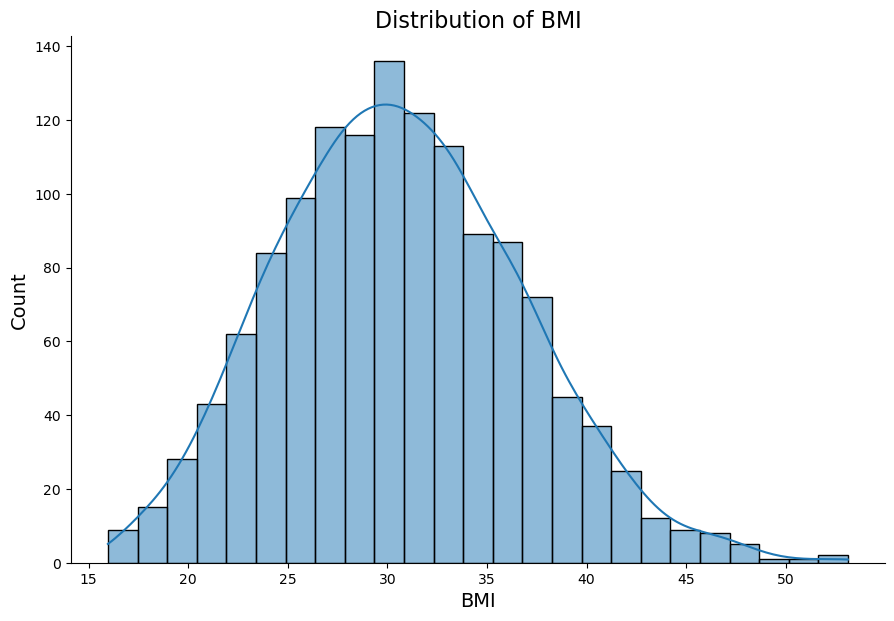

In [11]:
sns.displot(df, x="bmi", kde=True, height=6, aspect=1.5, palette=["green", "purple"])

# Customizing the plot
plt.title("Distribution of BMI", fontsize=16)
plt.xlabel("BMI", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Display the plot
plt.show()

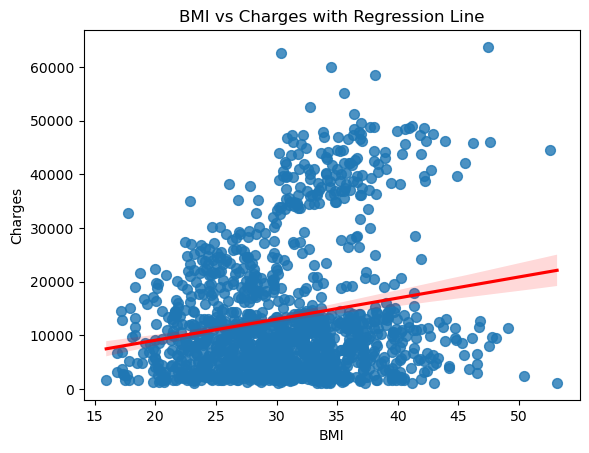

In [12]:
sns.regplot(data=df, x='bmi', y='charges', scatter_kws={'s': 50}, line_kws={"color": "red"})

# Display the plot
plt.title('BMI vs Charges with Regression Line')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

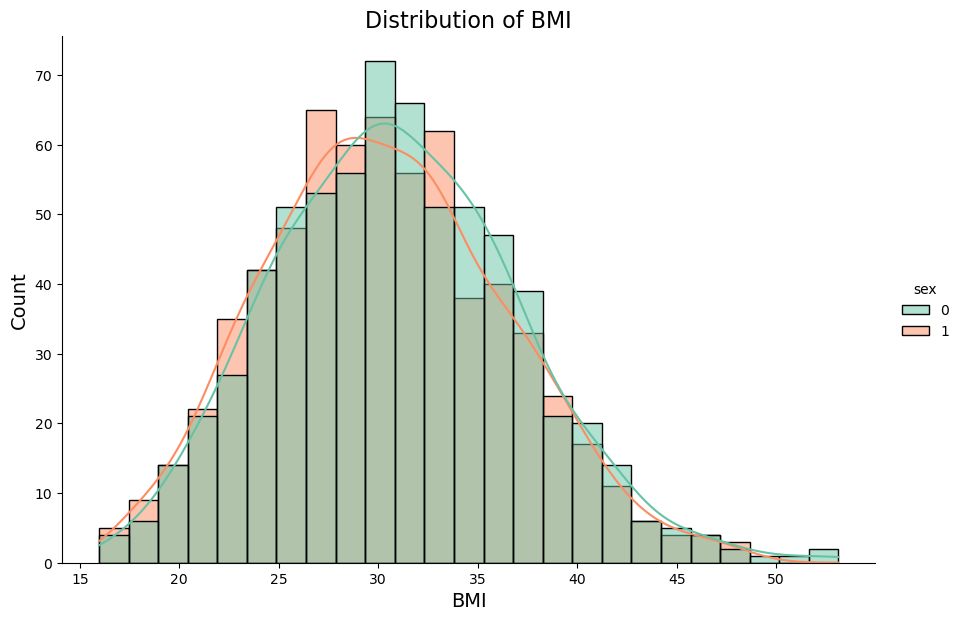

In [13]:
sns.displot(df, x="bmi", kde=True, hue="sex", height=6, aspect=1.5, palette="Set2")

# Customizing the plot
plt.title("Distribution of BMI", fontsize=16)
plt.xlabel("BMI", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Display the plot
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [15]:

x = df.drop(columns= 'charges',axis=1)
y= df['charges']

In [25]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [26]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,  test_size= 0.2, random_state=2)


In [17]:

 regressor = LinearRegression()

In [18]:
regressor.fit(x_train,y_train)

LinearRegression()

In [19]:
train_data_prediction = regressor.predict(x_train)

In [20]:
r2_train = r2_score(y_train,train_data_prediction )
print("R2 Value: ",r2_train)

R2 Value:  0.751505643411174


In [21]:
test_data_prediction = regressor.predict(x_test)

In [22]:


r2_train = r2_score(y_test,test_data_prediction )
print("R2 Value: ",r2_train)

R2 Value:  0.7447273869684077


In [23]:
input_data=(31,1,25.74,0,1,0) # 1->female 1->no 0->southeast

# Changing input_data to a numpy array 
input_data_as_numpay_array= np.asarray(input_data)

# Reshape the array
input_data_reshaped = input_data_as_numpay_array.reshape(1,-1)

# Prediction
prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD',prediction[0])

[3760.0805765]
The insurance cost is USD 3760.0805764960505


c:\Users\7202C\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
